# . Section 1

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Load the dataset
df= pd.read_csv("bank-subscribed_19 (15).csv")
print(df)

       age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pd

In [4]:
# Display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        44923 non-null  object
 2   marital    45211 non-null  object
 3   education  43354 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    32191 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   8252 non-null   object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
# Display basic information about the dataset
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
# Display basic information about the dataset
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN,no
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN,no
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN,no
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN,no


In [7]:
# Handling the missing values: Let's first check how many missing values are in each column.
missing_values = df.isnull().sum()
missing_values_percentage = (df.isnull().sum() / len(df)) * 100


In [8]:
# Visualize missing data percentage for each column
missing_data = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
missing_data = missing_data[missing_data['Missing Values'] > 0].sort_values(by='Percentage', ascending=False)


In [9]:
# Display missing data
missing_data

,Missing Values,Percentage
poutcome,36959,81.747805
contact,13020,28.798301
education,1857,4.107407
job,288,0.637013


# . Section 2
# (A) Check for duplicates, view duplicated rows, and remove them.

In [11]:
# Check for duplicate rows
duplicate_rows = df[df.duplicated()]

In [12]:
# Display duplicated rows (if any)
print(f"Number of duplicated rows: {duplicate_rows.shape[0]}")
duplicate_rows.head()

Number of duplicated rows: 0


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target


In [13]:
# Remove duplicate rows (if any)
df_cleaned = df.drop_duplicates()

In [14]:
# Confirm removal
print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")

Number of rows after removing duplicates: 45211


# (B) Check for outliers using boxplot and statistical methods, and remove them.

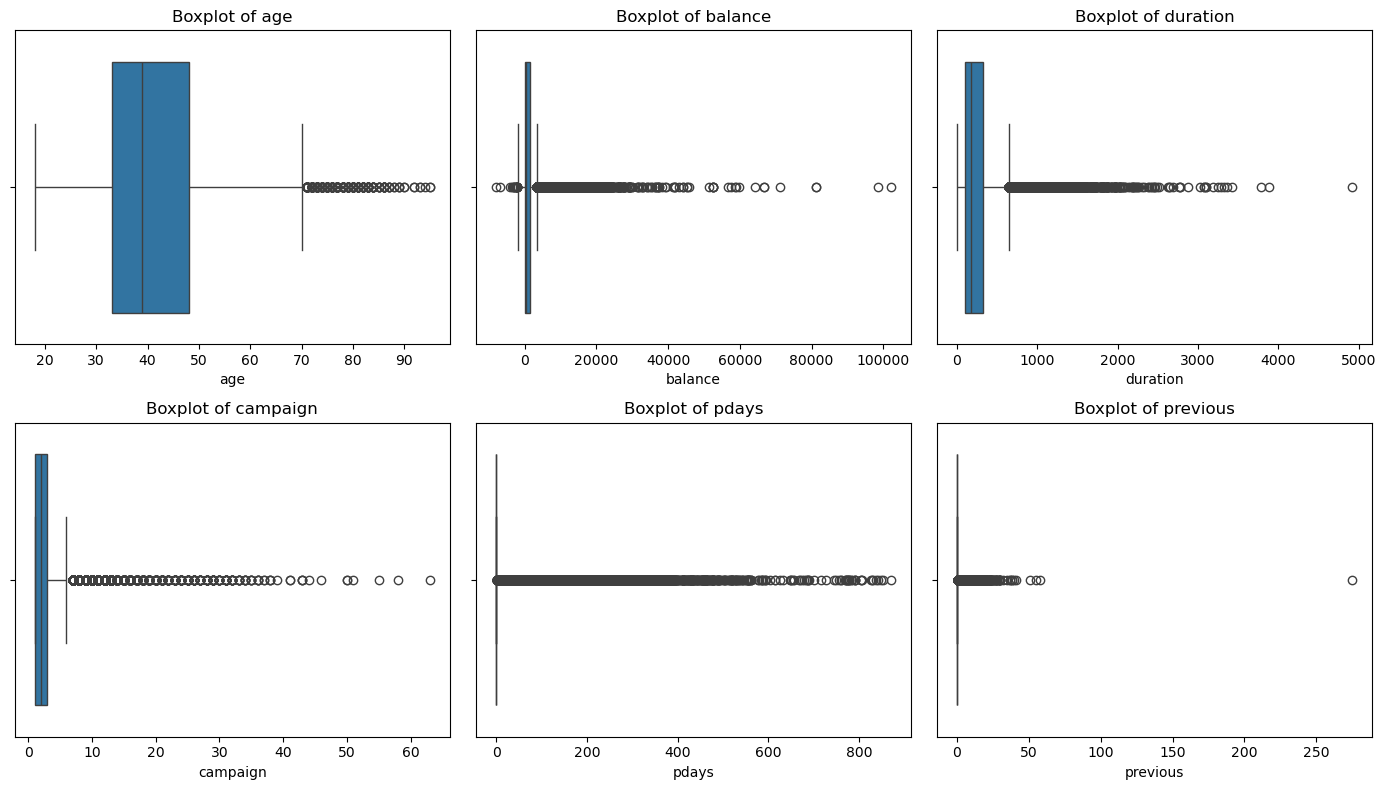

In [16]:
# Visualize outliers using boxplots for numeric features
numeric_columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']

plt.figure(figsize=(14, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df_cleaned, x=column)
    plt.title(f'Boxplot of {column}')
plt.tight_layout()
plt.show()

# Statistical method (IQR - Interquartile Range)

In [18]:
# Remove outliers using IQR method
Q1 = df_cleaned[numeric_columns].quantile(0.25)
Q3 = df_cleaned[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

In [19]:
# Identifying outliers: Data points outside 1.5*IQR
df_no_outliers = df_cleaned[~((df_cleaned[numeric_columns] < (Q1 - 1.5 * IQR)) | 
                              (df_cleaned[numeric_columns] > (Q3 + 1.5 * IQR))).any(axis=1)]

In [20]:
# Confirm removal
print(f"Number of rows after removing outliers is:\n{df_no_outliers.shape[0]}")

Number of rows after removing outliers is:
28193


# (c) For categorical features, draw countplot and write observations.

In [22]:
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']

C:\Users\PC\AppData\Local\Temp\ipykernel_25676\17480550.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_no_outliers, x=column, palette='Set2')
C:\Users\PC\AppData\Local\Temp\ipykernel_25676\17480550.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_no_outliers, x=column, palette='Set2')
C:\Users\PC\AppData\Local\Temp\ipykernel_25676\17480550.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_no_outliers, x=column, palette='Set2')
C:\Users\PC\AppData\Local\Temp\ipykernel_25676\17480550.py:5: FutureWarning:

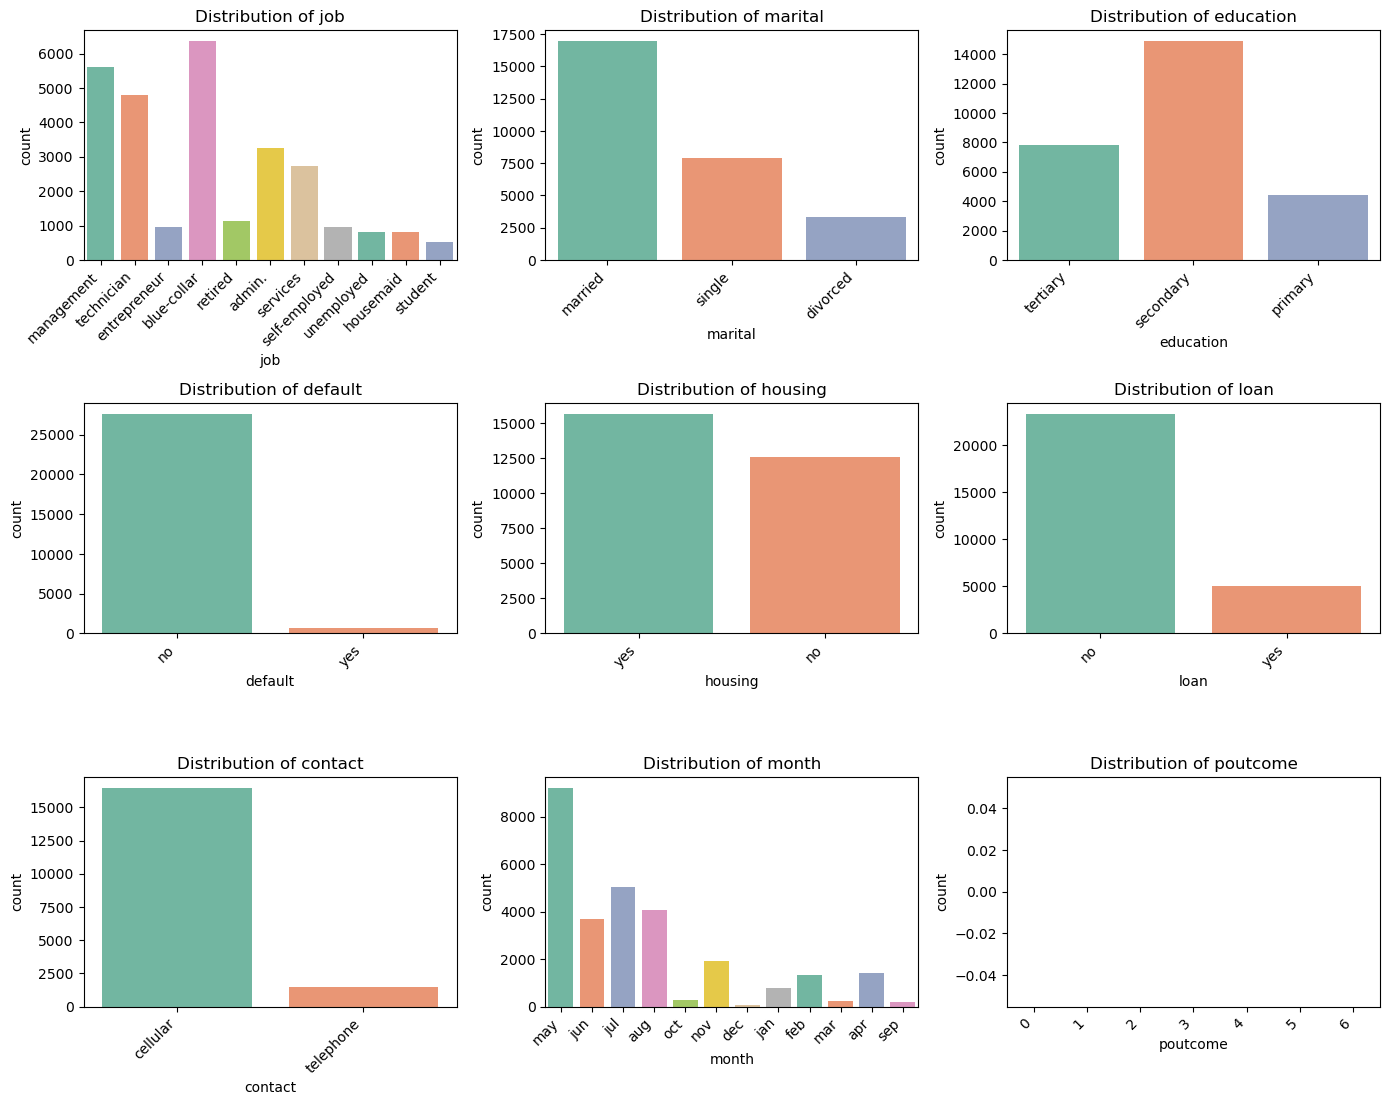

In [23]:
# we have the Plot countplots for each categorical features
plt.figure(figsize=(14, 14))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(4, 3, i)
    sns.countplot(data=df_no_outliers, x=column, palette='Set2')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Distribution of {column}')
    
plt.tight_layout()
plt.show()

In [24]:
# After viewing the plots, observe which categories dominate, if any. You can write down specific observations.

# (D).(a) For numeric features, draw a histogram, check skewness, and apply transformations if needed.

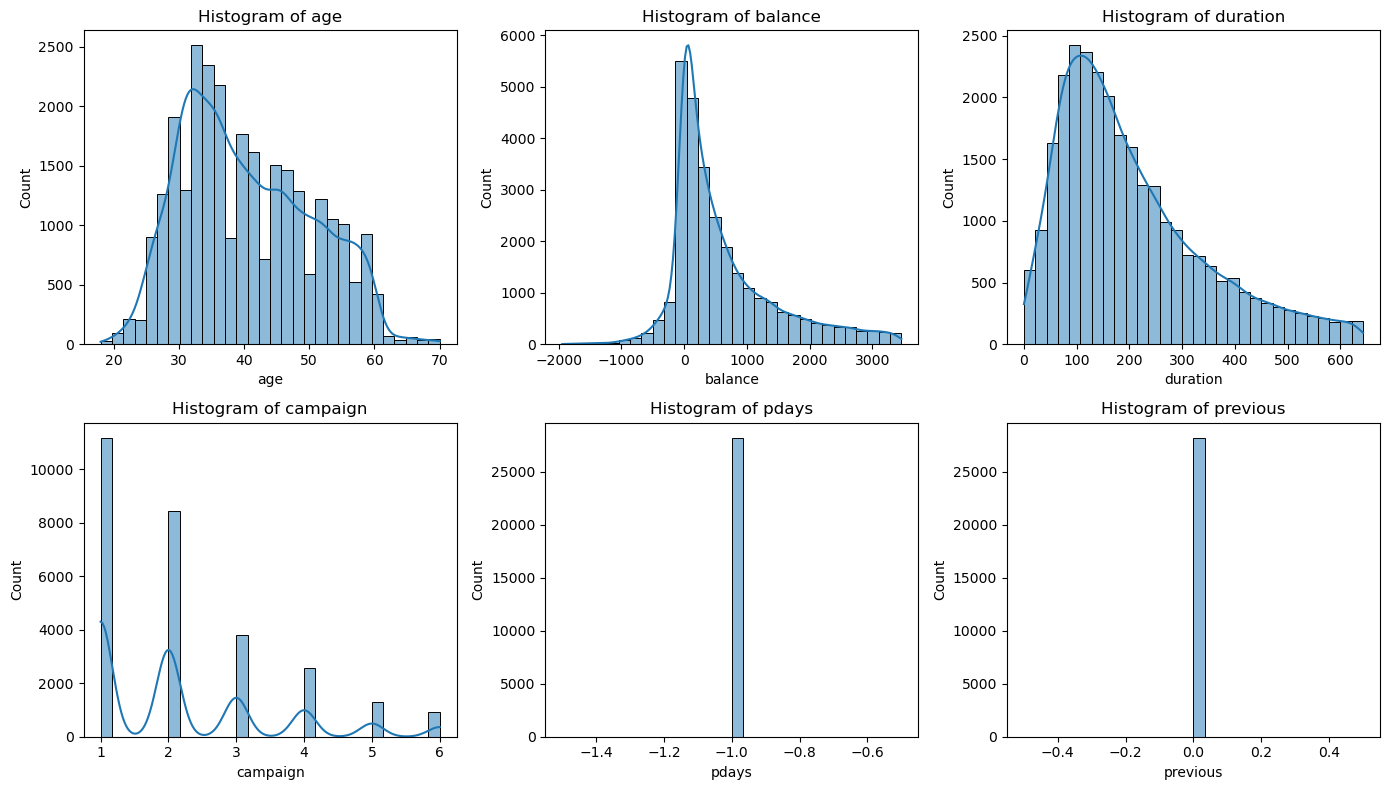

In [26]:
# Plot histograms for numeric features
plt.figure(figsize=(14, 8))
for i, column in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df_no_outliers[column], kde=True, bins=30)
    plt.title(f'Histogram of {column}')
    
plt.tight_layout()
plt.show()

# (b) Compute skewness:

In [28]:
# Compute skewness for numeric columns
from scipy.stats import skew

for column in numeric_columns:
    skewness = skew(df_no_outliers[column].dropna())
    print(f'Skewness of {column}: {skewness}')

Skewness of age: 0.38312659087917206
Skewness of balance: 1.3424762101585848
Skewness of duration: 1.038590879971595
Skewness of campaign: 1.154704251240982
Skewness of pdays: nan
Skewness of previous: nan


C:\Users\PC\AppData\Local\Temp\ipykernel_25676\1495147850.py:5: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness = skew(df_no_outliers[column].dropna())


# (c)Apply transformation (if skewed): If the skewness is high (e.g., greater than 0.75), you can apply transformations such as log or square root.

In [30]:
 #Apply log transformation to highly skewed data (e.g., balance)
df_no_outliers['balance_log'] = np.log1p(df_no_outliers['balance'])

# Check skewness again after transformation
print(f"Skewness after log transformation (balance): {skew(df_no_outliers['balance_log'].dropna())}")

Skewness after log transformation (balance): nan


C:\Users\PC\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\PC\anaconda3\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\PC\AppData\Local\Temp\ipykernel_25676\143084993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers['balance_log'] = np.log1p(df_no_outliers['balance'])
C:\Users\PC\anaconda3\Lib\site-packages\scipy\stats\_stats_py.py:1054: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


# section 3
# (a) Come up with a scatter plot with the hue parameter and write your observations.

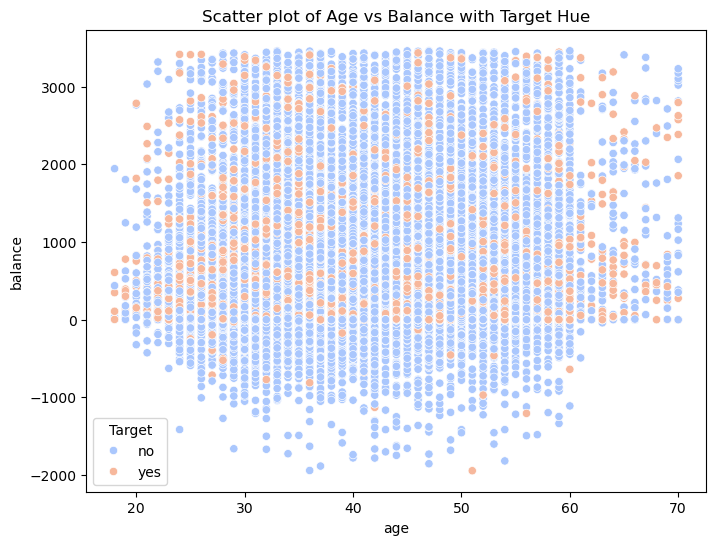

In [32]:
# Scatter plot of 'age' vs 'balance' with hue set to 'Target'
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_no_outliers, x='age', y='balance', hue='Target', palette='coolwarm')
plt.title('Scatter plot of Age vs Balance with Target Hue')
plt.show()


In [33]:
# A scatter plot with the hue parameter allows you to add color to different categories. Here's an example where we plot age vs balance and color 
# it by the Target feature (whether the client subscribed to a term deposit):
# the Visualizes relationships between two numeric variables while highlighting differences based on a categorical feature (e.g., Target).

# (b) the Compute correlation among independent features and demonstrate it using a heatmap.

In [35]:
# Compute correlation matrix for numeric features
corr_matrix = df_no_outliers[numeric_columns].corr()

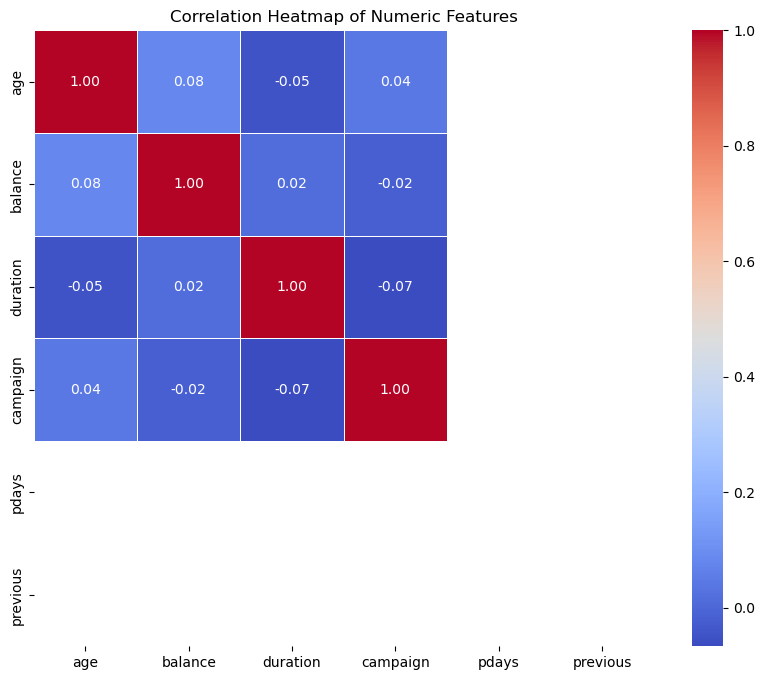

In [36]:
# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# (c) Apply any scaling method to at least two independent features.

In [38]:
from sklearn.preprocessing import StandardScaler

# Select two independent features to scale
features_to_scale = ['age', 'balance']

# Initialize the scaler
scaler = StandardScaler()


In [39]:
#Apply scaling
df_no_outliers[features_to_scale] = scaler.fit_transform(df_no_outliers[features_to_scale])


C:\Users\PC\AppData\Local\Temp\ipykernel_25676\3200857982.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_outliers[features_to_scale] = scaler.fit_transform(df_no_outliers[features_to_scale])


In [40]:
#Verify the scaling effect
df_no_outliers[features_to_scale].head()

,age,balance
0,1.783264,1.846693
1,0.366880,-0.694369
2,-0.745993,-0.726823
3,0.670391,1.081009
4,-0.745993,-0.728025


# (d) Convert categorical features into numeric ones using appropriate encoding techniques.

In [42]:
# One-Hot Encoding for categorical features
categorical_columns = ['job', 'marital', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
df_encoded = pd.get_dummies(df_no_outliers, columns=categorical_columns, drop_first=True)


In [43]:
# Label Encoding for 'education' (if there's an order)
from sklearn.preprocessing import LabelEncoder

In [44]:
# Assuming education has an inherent order, we can label encode it
label_encoder = LabelEncoder()
df_encoded['education'] = label_encoder.fit_transform(df_encoded['education'])

In [45]:
# Display the first few rows of the encoded dataframe
df_encoded.head()


,age,education,balance,day,duration,campaign,pdays,previous,Target,balance_log,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,1.783264,2,1.846693,5,261,1,-1,0,no,7.670429,...,False,False,False,False,False,False,True,False,False,False
1,0.366880,1,-0.694369,5,151,1,-1,0,no,3.401197,...,False,False,False,False,False,False,True,False,False,False
2,-0.745993,1,-0.726823,5,76,1,-1,0,no,1.098612,...,False,False,False,False,False,False,True,False,False,False
3,0.670391,3,1.081009,5,92,1,-1,0,no,7.317876,...,False,False,False,False,False,False,True,False,False,False
4,-0.745993,3,-0.728025,5,198,1,-1,0,no,0.693147,...,False,False,False,False,False,False,True,False,False,False


# section 4

# Compute correlation of each independent feature with dependent
# variable ‘target’. Select seven most important independent features from the set

In [48]:
# Ensure that the 'Target' column is encoded as numeric (1 for yes, 0 for no)
df_encoded['Target'] = df_no_outliers['Target'].apply(lambda x: 1 if x == 'yes' else 0)

In [49]:
# Compute correlation of all features with the 'Target'
correlation_with_target = df_encoded.corr()['Target'].sort_values(ascending=False)


In [50]:
# Display correlation of each independent feature with 'Target'
print("Correlation of independent features with Target:")
print(correlation_with_target)


Correlation of independent features with Target:
Target               1.000000
duration             0.249188
month_mar            0.171642
month_oct            0.123911
month_sep            0.094756
job_student          0.091094
month_dec            0.074754
marital_single       0.069219
education            0.066943
balance              0.065914
month_feb            0.049556
balance_log          0.049467
job_retired          0.036679
job_management       0.030443
job_unemployed       0.017850
contact_telephone    0.013318
job_self-employed    0.000564
month_jun           -0.001493
job_technician      -0.002160
job_housemaid       -0.009634
month_jan           -0.011443
month_nov           -0.011819
job_entrepreneur    -0.012466
default_yes         -0.014151
month_aug           -0.016023
job_services        -0.024099
age                 -0.026754
day                 -0.032742
month_jul           -0.044538
loan_yes            -0.058121
campaign            -0.059817
job_blue-collar     -

In [51]:
# Select the 7 most important independent features
top_7_features = correlation_with_target.drop('Target').head(7)
print("\nTop 7 most important features correlated with Target:")
print(top_7_features)


Top 7 most important features correlated with Target:
duration          0.249188
month_mar         0.171642
month_oct         0.123911
month_sep         0.094756
job_student       0.091094
month_dec         0.074754
marital_single    0.069219
Name: Target, dtype: float64


# Observations:

In [53]:
# (a) Features with high positive correlation indicate strong direct relationships with the target (likely to subscribe to if the feature increases).
# (b) Features with high negative correlation suggest an inverse relationship (less likely to subscribe to as the feature increases).

# section 5
# Consider ‘target’ column is prediction variable. Apply feature selection
# method to the dataset using SelectKBest() to reduce the dataset size to 7 features

In [55]:
# Define X and y
X = df_encoded.drop('Target', axis=1)  # Independent features
y = df_encoded['Target']  # Dependent variable (target)


In [56]:
# Check if there are any infinite values in the dataset
print("Number of infinite values in each column:")
print(np.isinf(X).sum())

Number of infinite values in each column:
age                   0
education             0
balance               0
day                   0
duration              0
campaign              0
pdays                 0
previous              0
balance_log          38
job_blue-collar       0
job_entrepreneur      0
job_housemaid         0
job_management        0
job_retired           0
job_self-employed     0
job_services          0
job_student           0
job_technician        0
job_unemployed        0
marital_married       0
marital_single        0
default_yes           0
housing_yes           0
loan_yes              0
contact_telephone     0
month_aug             0
month_dec             0
month_feb             0
month_jan             0
month_jul             0
month_jun             0
month_mar             0
month_may             0
month_nov             0
month_oct             0
month_sep             0
dtype: int64


In [57]:
# Replace infinite values with NaN (so they can be imputed or dropped)
X.replace([np.inf, -np.inf], np.nan, inplace=True)


In [58]:
# Check if there are any extremely large values
print("Maximum value in each column:")
print(X.max())

Maximum value in each column:
age                  2.997307
education                   3
balance              3.432152
day                        31
duration                  643
campaign                    6
pdays                      -1
previous                    0
balance_log          8.149891
job_blue-collar          True
job_entrepreneur         True
job_housemaid            True
job_management           True
job_retired              True
job_self-employed        True
job_services             True
job_student              True
job_technician           True
job_unemployed           True
marital_married          True
marital_single           True
default_yes              True
housing_yes              True
loan_yes                 True
contact_telephone        True
month_aug                True
month_dec                True
month_feb                True
month_jan                True
month_jul                True
month_jun                True
month_mar                True
month_may 

In [59]:
# Import necessary libraries
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.impute import SimpleImputer

In [60]:
# Impute missing values (NaNs) with median (or mean/mode)
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

In [61]:
# Apply SelectKBest to select top 7 features
selector = SelectKBest(score_func=f_classif, k=7)
X_selected = selector.fit_transform(X_imputed, y)


C:\Users\PC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [6 7] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\PC\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [62]:
selected_feature_indices = selector.get_support(indices=True)
selected_features = X.columns[selected_feature_indices]


In [63]:
# Output the selected features
print("\nTop 7 selected features:")
print(selected_features)


Top 7 selected features:
Index(['duration', 'job_student', 'housing_yes', 'month_mar', 'month_may',
       'month_oct', 'month_sep'],
      dtype='object')


# The comments and conclusions/observations carry marks for each section.

In [65]:

#1. Handling Missing Data: Missing values (NaNs) and infinite values were identified and handled using imputation (median for numeric features).
#2. Feature Selection: Using the SelectKBest method with ANOVA F-test, the top 7 features that are most predictive of the target variable (Target) 
#   were selected.
# Key Observations:
#(a) Some features had missing values or infinite values that needed to be addressed before applying machine learning techniques.
#(b) After applying feature selection, we reduced the number of features to 7, simplifying the dataset and retaining the most important predictors.
#(c) Cleaning the dataset by removing or imputing missing and infinite values is critical to ensure successful model training and accurate predictions.
#Note: This process highlights the importance of pre-processing and feature selection in building a more efficient predictive model.
#Let me know if you need additional details or further assistance!






